## Bloch sphere for Qibo

This is a tutorial to learn how to use the Bloch sphere implemented in `qibo`!

In [1]:
import numpy as np
import matplotlib
%matplotlib notebook

from qibo import Circuit, gates
from qibo.ui.bloch import Bloch

First of all, let's `plot` an empty Bloch sphere.

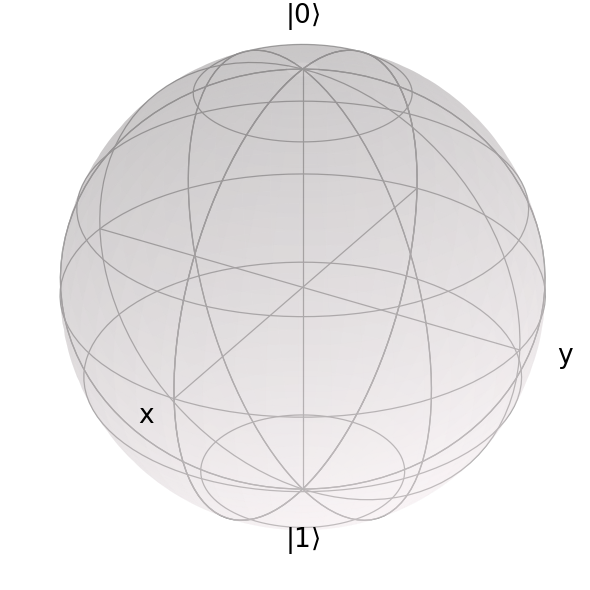

In [2]:
bs = Bloch(backend="jupyter")
bs.plot()

The `plot` function allows to `save` the plot in a file.

In [3]:
bs.save(filename="first_bloch_sphere.pdf")

It is possible to add vectors to the sphere with two functions: 

(1) `add_state`: this function allows to add to the sphere the output of a Qibo circuit; \
(2) `add_vector`: this function allows to add to the sphere a vector with three components x, y, z such that x^2 + y^2 + z^2 = 1;

For both functions it is possible to specify:

a. the desired `color`; \
b. the representation `mode`, which can be either `point` or `vector`.

Let's see these two functions in action.

[Qibo 0.2.19|INFO|2025-07-16 17:40:32]: Using qibojit (numba) backend on /CPU:0


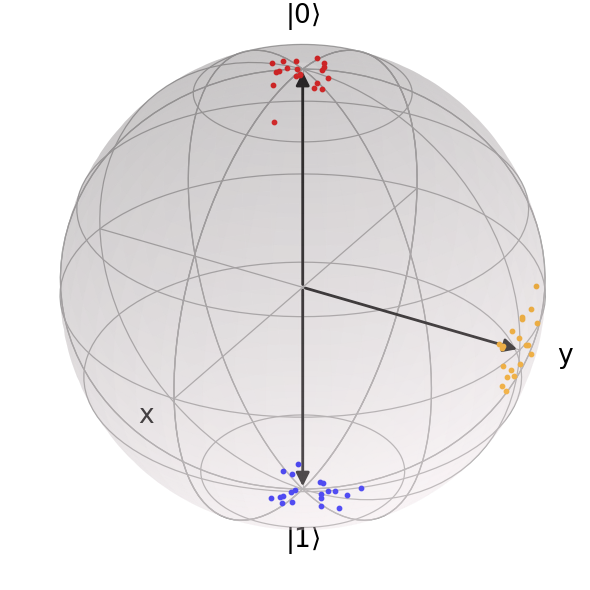

In [4]:
bs.add_state(np.array([1, 0]), color="black")
bs.add_state(np.array([0, 1]), color="black")
bs.add_vector(np.array([0, 1, 0]), color="black")

def _circuit():
    circ = Circuit(1)
    circ.add(gates.RY(q=0, theta=np.random.randn() * 0.1))
    circ.add(gates.RX(q=0, theta=np.random.randn() * 0.1))
    circ.add(gates.RZ(q=0, theta=np.random.randn() * 0.1))
    return circ

for i in range(20):
    state = _circuit()(np.array([1, 0], dtype="complex")).state()
    bs.add_state(state, mode="point", color="red")

for i in range(20):
    circ = _circuit()
    circ.add(gates.RX(q=0, theta=-np.pi / 2))
    bs.add_state(circ().state(), mode="point", color="orange")

for i in range(20):
    circ = _circuit()
    state = circ(np.array([0, 1], dtype="complex")).state()
    bs.add_state(state, mode="point", color="blue")

bs.plot()

After plotting some state, it is possible to `clear` the sphere.

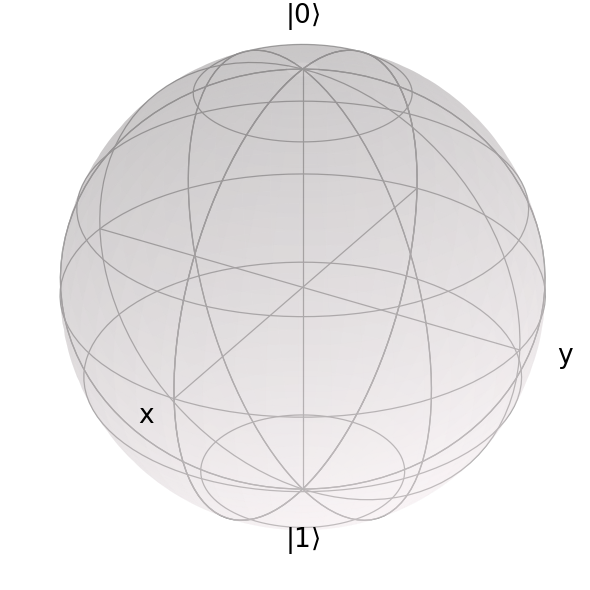

In [5]:
bs.clear()
bs.plot()

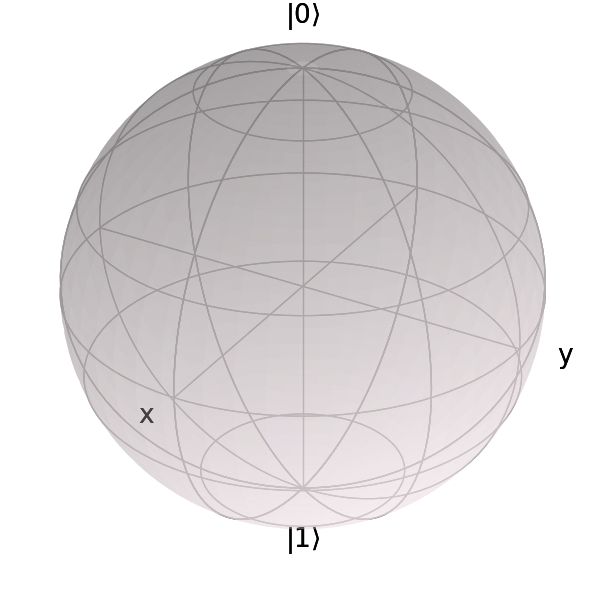

In [5]:
bs.plot()

The arguments of the functions `add_state` and `add_vector` are:

(1) `add_state`: 
- *state*: np.ndarray, list 
- *mode*: np.ndarray, list, str 
- *color*: np.ndarray, list, str 

(2) `add_vector`: 
- *vector*: np.ndarray, list 
- *mode*: np.ndarray, list, str 
- *color*: np.ndarray, list, str

Below is an example showcasing some combinations of these arguments.

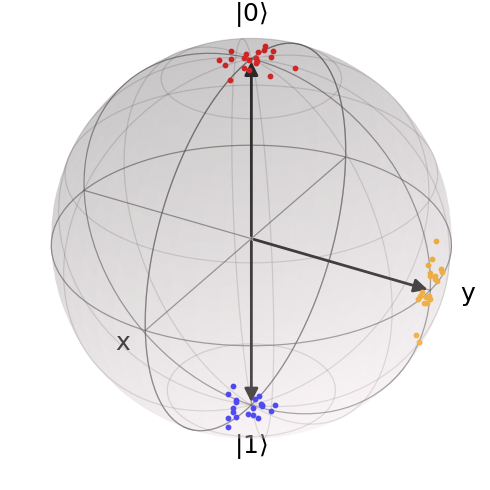

In [25]:
bs.clear()

bs.add_state(np.array([1, 0]), color="black")
bs.add_state(np.array([0, 1]), color="black")
bs.add_vector(np.array([0, 1, 0]), color="black")

n = 20

states = np.zeros(shape=(n, 2), dtype="complex")
color_states = []
mode_state = []
for i in range(n):
    circ = Circuit(1)
    circ.add(gates.RY(q=0, theta=np.random.randn() * 0.1))
    circ.add(gates.RX(q=0, theta=np.random.randn() * 0.1))
    circ.add(gates.RZ(q=0, theta=np.random.randn() * 0.1))
    state = circ().state()
    states[i] = state
    color_states.append("red")
    mode_state.append("point")

bs.add_state(states, mode=mode_state, color=color_states)

for i in range(n):
    circ = Circuit(1)
    circ.add(gates.RX(q=0, theta=-np.pi / 2))
    circ.add(gates.RY(q=0, theta=np.random.randn() * 0.1))
    circ.add(gates.RZ(q=0, theta=np.random.randn() * 0.1))
    circ.add(gates.RX(q=0, theta=np.random.randn() * 0.1))
    state = circ().state()
    bs.add_state(state, mode="point", color="orange")

for i in range(n):
    circ = Circuit(1)
    circ.add(gates.RY(q=0, theta=np.random.randn() * 0.1))
    circ.add(gates.RX(q=0, theta=np.random.randn() * 0.1))
    circ.add(gates.RZ(q=0, theta=np.random.randn() * 0.1))
    state = circ(np.array([0, 1], dtype="complex")).state()
    bs.add_state(state, mode="point", color="blue")

bs.plot()